Loading and Visualizing Data ...


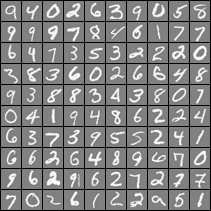

In [8]:
%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

In [9]:
%% ============ Part 2a: Vectorize Logistic Regression ============
%  In this part of the exercise, you will reuse your logistic regression
%  code from the last exercise. You task here is to make sure that your
%  regularized logistic regression implementation is vectorized. After
%  that, you will implement one-vs-all classification for the handwritten
%  digit dataset.
%

% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Testing lrCostFunction() with regularization
Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


In [10]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)
%ONEVSALL trains multiple logistic regression classifiers and returns all
%the classifiers in a matrix all_theta, where the i-th row of all_theta 
%corresponds to the classifier for label i
%   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
%   logistic regression classifiers and returns each of these classifiers
%   in a matrix all_theta, where the i-th row of all_theta corresponds 
%   to the classifier for label i

% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: You should complete the following code to train num_labels
%               logistic regression classifiers with regularization
%               parameter lambda. 
%
% Hint: theta(:) will return a column vector.
%
% Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
%       whether the ground truth is true/false for this class.
%
% Note: For this assignment, we recommend using fmincg to optimize the cost
%       function. It is okay to use a for-loop (for c = 1:num_labels) to
%       loop over the different classes.
%
%       fmincg works similarly to fminunc, but is more efficient when we
%       are dealing with large number of parameters.
%
% Example Code for fmincg:
%
%     % Set Initial theta
%     initial_theta = zeros(n + 1, 1);
%     
%     % Set options for fminunc
%     options = optimset('GradObj', 'on', 'MaxIter', 50);
% 
%     % Run fmincg to obtain the optimal theta
%     % This function will return theta and the cost 
%     [theta] = ...
%         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
%                 initial_theta, options);
%
initial_theta = zeros(n+1,1);
options = optimset('GradObj', 'on', 'MaxIter', 50);

for i=1:num_labels,
    all_theta(i,:) = fmincg(@(t)(lrCostFunction(t,X,(y==i), lambda)), initial_theta, options)';
endfor



end

In [4]:
%% ============ Part 2b: One-vs-All Training ============
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;
[all_theta] = oneVsAll(X, y, num_labels, lambda);


Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.407143e-02
Iteration    50 | Cost: 5.725285e-02
Iteration    50 | Cost: 6.352580e-02
Iteration    50 | Cost: 3.834617e-02
Iteration    50 | Cost: 6.132811e-02
Iteration    50 | Cost: 2.209850e-02
Iteration    50 | Cost: 3.570226e-02
Iteration    50 | Cost: 8.425793e-02
Iteration    50 | Cost: 7.853854e-02
Iteration    50 | Cost: 9.969359e-03


In [5]:
function p = predictOneVsAll(all_theta, X)
%PREDICT Predict the label for a trained one-vs-all classifier. The labels 
%are in the range 1..K, where K = size(all_theta, 1). 
%  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
%  for each example in the matrix X. Note that X contains the examples in
%  rows. all_theta is a matrix where the i-th row is a trained logistic
%  regression theta vector for the i-th class. You should set p to a vector
%  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
%  for 4 examples) 

m = size(X, 1);
num_labels = size(all_theta, 1);

% You need to return the following variables correctly 
p = zeros(size(X, 1), 1);

% Add ones to the X data matrix
X = [ones(m, 1) X];

% ====================== YOUR CODE HERE ======================
% Instructions: Complete the following code to make predictions using
%               your learned logistic regression parameters (one-vs-all).
%               You should set p to a vector of predictions (from 1 to
%               num_labels).
%
% Hint: This code can be done all vectorized using the max function.
%       In particular, the max function can also return the index of the 
%       max element, for more information see 'help max'. If your examples 
%       are in rows, then, you can use max(A, [], 2) to obtain the max 
%       for each row.
%       

prediction = sigmoid(X*all_theta');
[index, val] = max(prediction, [], 2);
p = val;



% =========================================================================


end

In [6]:
%% ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 94.960000
